In [272]:
### Python Notebook for Working through Common Stats

In [273]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import math
import statistics as stats
%matplotlib inline

In [274]:
### Correlations

In [275]:
x = np.random.normal(0,1, 100)
y = np.random.normal(0,1, 100)

In [276]:
z = (0.85 * x) + (math.sqrt(1-0.85**2) * y)

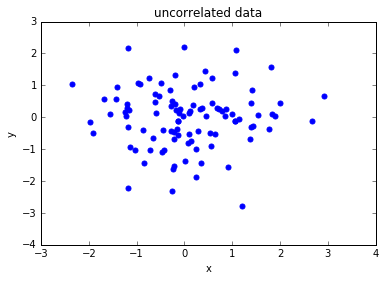

In [277]:
fig = plt.scatter(x, y, label='uncorrelated data', color='b', s=25, marker='o')
ax = plt.axes()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('uncorrelated data')
plt.show(fig)

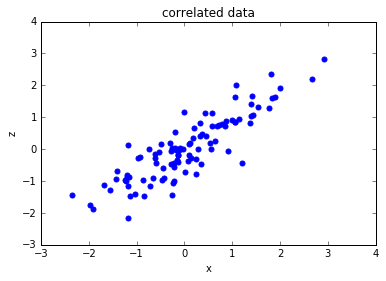

In [278]:
fig = plt.scatter(x, z, label='uncorrelated data', color='b', s=25, marker='o')
ax = plt.axes()
ax.set_xlabel('x')
ax.set_ylabel('z')
plt.title('correlated data')
plt.show(fig)

In [279]:
from scipy.stats.stats import pearsonr

In [280]:
pearsonr(x, y)
### First value is correlation coefficient, second is two-tailed pvalue

(0.01429247056090952, 0.88776330940974424)

In [281]:
### Manually calculate correlation
mean_x = x.mean()
mean_y = y.mean()
sd_x = x.std()
sd_y = y.std()
cor = stats.mean((x-mean_x)*(y-mean_y))/(sd_x * sd_y)
print(cor)

0.0142924705609


In [282]:
##It matches well between the two approaches.

In [283]:
pearsonr(x, z)

(0.87254006240830495, 2.9889503232358561e-32)

In [284]:
### Fit a linear model
from sklearn import linear_model 

In [285]:
regr = linear_model.LinearRegression()
##Prep data for what regr expects
x_rs = x.reshape(-1, 1)
z_rs = z.reshape(-1, 1)
regr.fit(x_rs, z_rs)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

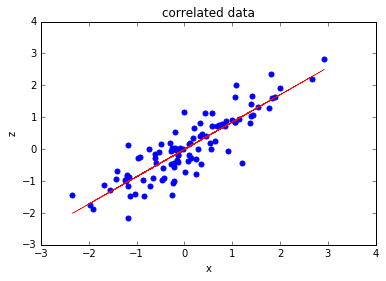

In [286]:
fig = plt.scatter(x, z, label='uncorrelated data', color='b', s=25, marker='o')
ax = plt.axes()
ax.set_xlabel('x')
ax.set_ylabel('z')
plt.title('correlated data')
plt.plot(x_rs, regr.predict(x_rs), color='red', linewidth=0.5)
plt.show(fig)

In [287]:
slope = round(regr.coef_[0][0], 2)
y_intercept = round(regr.intercept_[0], 2)

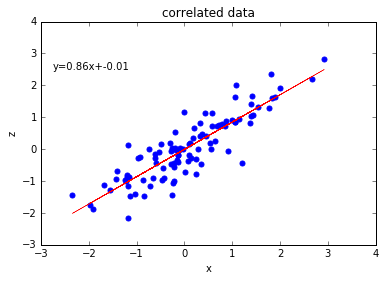

In [288]:
fig = plt.scatter(x, z, label='uncorrelated data', color='b', s=25, marker='o')
ax = plt.axes()
ax.set_xlabel('x')
ax.set_ylabel('z')
plt.title('correlated data')
plt.plot(x_rs, regr.predict(x_rs), color='red', linewidth=0.5)
ax.text(-2.75, 2.5, 'y=' + str(slope) + 'x+' + str(y_intercept))
plt.show(fig)

In [289]:
print(regr.score(x_rs, z_rs)) ##R^2 or Goodness of fit
print(pearsonr(x, z)[0]) ##Correlation coefficient
cor = pearsonr(x, z)[0]
cor**2
###Goodness of fit is correlation coefficient squared.

0.761326160507
0.872540062408


0.76132616050748869

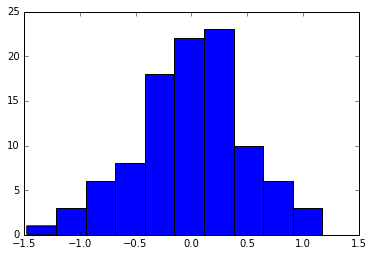

In [290]:
###Calculate Residuals
mod_z = slope * x + y_intercept
residuals = z - mod_z
plt.hist(residuals)
plt.show()

In [291]:
###Root Mean Squares
print(residuals.std())
rms = np.sqrt(stats.mean(residuals * residuals))
print(rms)

###Root mean square is the same(? or highly related) to the standard deviation
###Variance is the mean of the square of all residuals (from a model or from the mean)

0.489138891027
0.489144513866


In [ ]:
###Variance scaling
##Var(aX) = (a**2)Var(X)

In [ ]:
###Variance of two  variables
#Var(X + Y) = Var(X) + Var(Y) + 2Cov(X, Y)
###If random Cov(X,Y) = 0
#Var(X + Y) = Var(X) + Var(Y)
###If Var(X) = Var(Y)
#Var(X + Y) = 2Var(X)
###Variance of the mean of these values (i.e. multiple estimates of a mean of a population)
#Var((X + Y)/2) = 2Var(X)/(2**2)
#Var((X + Y)/2) = Var(X)/2
#SD(X + Y) = SD(X)/sqrt(2) ####This is standard error